# Tugas Besar IF2220 Probabilitas dan Statistika
## Penarikan Kesimpulan dan Pengujian Hipotesis
### Tujuan:
- Mahasiswa memahami dan dapat menyelesaikan persoalan distribusi peluang variabel
random diskrit dan kontinu, dan
- Mahasiswa mampu menyelesaikan persoalan untuk menarik kesimpulan mengenai
parameter populasi yang diperoleh dari data hasil eksperimen.
- Mahasiswa mampu menyelesaikan persoalan pengujian hipotesis.

## Anggota Kelompok
1. Mahesa Lizardy (13520116)
2. Muhammad Gilang Ramadhan (13520137)

### Soal Tugas

Diberikan sebuah data water_potability.csv yang dapat diakses pada Dataset
Tugas Besar IF2220. water_potability.csv merupakan data metrik kualitas air yang
mengandung 11 kolom sebagai berikut:

1. id
2. pH
3. Hardness
4. Solids
5. Chloramines
6. Sulfate
7. Conductivity
8. OrganicCarbon
9. Trihalomethanes
10. Turbidity
11. Potability

Kolom 2-10 adalah kolom atribut (non-target), sedangkan kolom 11 adalah kolom target.
Anda diminta untuk melakukan analisis statistika sebagai berikut:

---
### 0. Import Library and  Load Data

In [1]:
from IPython.display import Markdown, display
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import numpy as np

def printM(string):
    display(Markdown(string))

columnsName = ["id","pH","Hardness","Solids","Chloramines","Sulfate","Conductivity","OrganicCarbon","Trihalomethanes","Turbidity","Potability"]
water_potability = pd.read_csv("water_potability.csv", names= columnsName)
# shows top 10 rows
water_potability.head(10)

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
0,1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
5,6,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0
6,7,7.360640,165.520797,32452.614409,7.550701,326.624353,425.383419,15.586810,78.740016,3.662292,0
7,8,7.119824,156.704993,18730.813653,3.606036,282.344050,347.715027,15.929536,79.500778,3.445756,0
8,9,6.347272,186.732881,41065.234765,9.629596,364.487687,516.743282,11.539781,75.071617,4.376348,0
9,10,9.181560,273.813807,24041.326280,6.904990,398.350517,477.974642,13.387341,71.457362,4.503661,0


---
### 1. Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain

In [2]:
# Prosedur untuk menulis deskripsi statistik dari suatu kolom di tabel
def StatisticDescription(Column):
    # Tulis statistik deskriptif dari kolom Column
    print("count\t\t\t: {}".format(len(Column)))
    print("mean\t\t\t: {}".format(Column.mean()))
    print("median\t\t\t: {}".format(Column.median()))
    print("modus\t\t\t: {}".format(Column.mode()[0]))
    print("standar deviasi\t\t: {}".format(Column.std()))
    print("variansi\t\t: {}".format(Column.std()**2))
    print("range\t\t\t: {}".format(Column.max()-Column.min()))
    print("nilai minimum\t\t: {}".format(Column.min()))
    print("nilai maksimum\t\t: {}".format(Column.max()))
    quartiles = Column.quantile([0,0.25,0.5,0.75,1])
    for i,quartile in enumerate(quartiles):
        print("Kuartil-{}\t\t: {}".format(i,quartile))
    print("IQR\t\t\t: {}".format(quartiles[0.75]-quartiles[0.25]))
    print("skewness\t\t: {}".format(Column.skew()))
    print("kurtosis\t\t: {}".format(scipy.stats.kurtosis(Column, fisher=False)))

#### 1. id

Pada id, tidak perlu ditulis deskripsi statistiknya. Dikarenakan id hanya merepresentasikan identifier yang unik pada tiap baris di masing-masing kolom dari tabel water_potability.csv atau dengan kata lain kolom ini bukan merupakan kolom numerik

#### 2. pH

In [3]:
# Ambil kolom pH
pH = water_potability["pH"]
# Tulis deskripsi statistika dari kolom pH
print("Deskripsi statistika dari kolom pH adalah sebagai berikut.")
StatisticDescription(pH)

Deskripsi statistika dari kolom pH adalah sebagai berikut.
count			: 2010
mean			: 7.0871927687138285
median			: 7.029490455474185
modus			: 0.2274990502021987
standar deviasi		: 1.5728029470456655
variansi		: 2.4737091102355304
range			: 13.7725009497978
nilai minimum		: 0.2274990502021987
nilai maksimum		: 13.999999999999998
Kuartil-0		: 0.2274990502021987
Kuartil-1		: 6.09078502142353
Kuartil-2		: 7.029490455474185
Kuartil-3		: 8.053006240791538
Kuartil-4		: 13.999999999999998
IQR			: 1.9622212193680078
skewness		: 0.04853451405270669
kurtosis		: 3.622362158216349


#### 3. Hardness

In [4]:
# Ambil kolom Hardness
Hardness = water_potability["Hardness"]
# Tulis deskripsi statistika dari kolom Hardness
print("Deskripsi statistika dari kolom Hardness adalah sebagai berikut.")
StatisticDescription(Hardness)

Deskripsi statistika dari kolom Hardness adalah sebagai berikut.
count			: 2010
mean			: 195.96920903783524
median			: 197.20352491941043
modus			: 73.4922336890611
standar deviasi		: 32.643165859429864
variansi		: 1065.5762773262475
range			: 243.84589036652147
nilai minimum		: 73.4922336890611
nilai maksimum		: 317.33812405558257
Kuartil-0		: 73.4922336890611
Kuartil-1		: 176.74065667669896
Kuartil-2		: 197.20352491941043
Kuartil-3		: 216.44758866727156
Kuartil-4		: 317.33812405558257
IQR			: 39.7069319905726
skewness		: -0.08532104172868622
kurtosis		: 3.521190648776977


#### 4. Solids

In [5]:
# Ambil kolom Solids
Solids = water_potability["Solids"]
# Tulis deskripsi statistika dari kolom Solids
print("Deskripsi statistika dari kolom Solids adalah sebagai berikut.")
StatisticDescription(Solids)

Deskripsi statistika dari kolom Solids adalah sebagai berikut.
count			: 2010
mean			: 21904.673439053095
median			: 20926.88215534375
modus			: 320.942611274359
standar deviasi		: 8625.397911190576
variansi		: 74397489.12637074
range			: 56167.72980146483
nilai minimum		: 320.942611274359
nilai maksimum		: 56488.67241273919
Kuartil-0		: 320.942611274359
Kuartil-1		: 15614.412961614333
Kuartil-2		: 20926.88215534375
Kuartil-3		: 27170.534648603603
Kuartil-4		: 56488.67241273919
IQR			: 11556.12168698927
skewness		: 0.5910113724580447
kurtosis		: 3.333498156306705


#### 5. Chloramines

In [6]:
# Ambil kolom Chloramines
Chloramines = water_potability["Chloramines"]
# Tulis deskripsi statistika dari kolom Chloramines
print("Deskripsi statistika dari kolom Chloramines adalah sebagai berikut.")
StatisticDescription(Chloramines)

Deskripsi statistika dari kolom Chloramines adalah sebagai berikut.
count			: 2010
mean			: 7.134322344600104
median			: 7.1420143046226645
modus			: 1.3908709048851806
standar deviasi		: 1.5852140982642102
variansi		: 2.512903737335613
range			: 11.736129095114823
nilai minimum		: 1.3908709048851806
nilai maksimum		: 13.127000000000002
Kuartil-0		: 1.3908709048851806
Kuartil-1		: 6.138326387572855
Kuartil-2		: 7.1420143046226645
Kuartil-3		: 8.109933216133502
Kuartil-4		: 13.127000000000002
IQR			: 1.9716068285606472
skewness		: 0.013003497779569528
kurtosis		: 3.5454318545555785


#### 6. Sulfate

In [7]:
# Ambil kolom Sulfate
Sulfate = water_potability["Sulfate"]
# Tulis deskripsi statistika dari kolom Sulfate
print("Deskripsi statistika dari kolom Sulfate adalah sebagai berikut.")
StatisticDescription(Sulfate)

Deskripsi statistika dari kolom Sulfate adalah sebagai berikut.
count			: 2010
mean			: 333.211376415189
median			: 332.2141128069568
modus			: 129.00000000000003
standar deviasi		: 41.21111102560979
variansi		: 1698.3556719651367
range			: 352.03064230599716
nilai minimum		: 129.00000000000003
nilai maksimum		: 481.0306423059972
Kuartil-0		: 129.00000000000003
Kuartil-1		: 307.6269864860709
Kuartil-2		: 332.2141128069568
Kuartil-3		: 359.26814739141554
Kuartil-4		: 481.0306423059972
IQR			: 51.641160905344634
skewness		: -0.04572780443653543
kurtosis		: 3.7819149219038866


#### 7. Conductivity

In [8]:
# Ambil kolom Conductivity
Conductivity = water_potability["Conductivity"]
# Tulis deskripsi statistika dari kolom Conductivity
print("Deskripsi statistika dari kolom Conductivity adalah sebagai berikut.")
StatisticDescription(Conductivity)

Deskripsi statistika dari kolom Conductivity adalah sebagai berikut.
count			: 2010
mean			: 426.47670835257907
median			: 423.43837202443706
modus			: 201.6197367551575
standar deviasi		: 80.70187180729437
variansi		: 6512.792113200973
range			: 551.7228828031471
nilai minimum		: 201.6197367551575
nilai maksimum		: 753.3426195583046
Kuartil-0		: 201.6197367551575
Kuartil-1		: 366.61921929632433
Kuartil-2		: 423.43837202443706
Kuartil-3		: 482.2097724598859
Kuartil-4		: 753.3426195583046
IQR			: 115.5905531635616
skewness		: 0.26801233302645316
kurtosis		: 2.760400057844864


#### 8. OrganicCarbon

In [9]:
# Ambil kolom OrganicCarbon
OrganicCarbon = water_potability["OrganicCarbon"]
# Tulis deskripsi statistika dari kolom OrganicCarbon
print("Deskripsi statistika dari kolom OrganicCarbon adalah sebagai berikut.")
StatisticDescription(OrganicCarbon)

Deskripsi statistika dari kolom OrganicCarbon adalah sebagai berikut.
count			: 2010
mean			: 14.357939902048074
median			: 14.323285610653329
modus			: 2.1999999999999886
standar deviasi		: 3.3257700016987197
variansi		: 11.060746104199103
range			: 24.80670661116602
nilai minimum		: 2.1999999999999886
nilai maksimum		: 27.00670661116601
Kuartil-0		: 2.1999999999999886
Kuartil-1		: 12.122530374047727
Kuartil-2		: 14.323285610653329
Kuartil-3		: 16.683561746173808
Kuartil-4		: 27.00670661116601
IQR			: 4.561031372126081
skewness		: -0.02021975629181238
kurtosis		: 3.027957691493332


#### 9. Trihalomethanes

In [10]:
# Ambil kolom Trihalomethanes
Trihalomethanes = water_potability["Trihalomethanes"]
# Tulis deskripsi statistika dari kolom Trihalomethanes
print("Deskripsi statistika dari kolom Trihalomethanes adalah sebagai berikut.")
StatisticDescription(Trihalomethanes)

Deskripsi statistika dari kolom Trihalomethanes adalah sebagai berikut.
count			: 2010
mean			: 66.40071666307466
median			: 66.48204080309809
modus			: 8.577012932983806
standar deviasi		: 16.08110898232513
variansi		: 258.60206610141796
range			: 115.4229870670162
nilai minimum		: 8.577012932983806
nilai maksimum		: 124.0
Kuartil-0		: 8.577012932983806
Kuartil-1		: 55.94999302803186
Kuartil-2		: 66.48204080309809
Kuartil-3		: 77.2946128060674
Kuartil-4		: 124.0
IQR			: 21.344619778035543
skewness		: -0.05138268451619478
kurtosis		: 3.2194788089667044


#### 10. Turbidity

In [11]:
# Ambil kolom Turbidity
Turbidity = water_potability["Turbidity"]
# Tulis deskripsi statistika dari kolom Turbidity
print("Deskripsi statistika dari kolom Turbidity adalah sebagai berikut.")
StatisticDescription(Turbidity)

Deskripsi statistika dari kolom Turbidity adalah sebagai berikut.
count			: 2010
mean			: 3.9694969126303676
median			: 3.967373963531836
modus			: 1.45
standar deviasi		: 0.7804710407083957
variansi		: 0.6091350453844462
range			: 5.044748555990993
nilai minimum		: 1.45
nilai maksimum		: 6.494748555990993
Kuartil-0		: 1.45
Kuartil-1		: 3.442881623557439
Kuartil-2		: 3.967373963531836
Kuartil-3		: 4.5146627202018825
Kuartil-4		: 6.494748555990993
IQR			: 1.0717810966444437
skewness		: -0.03226597968019271
kurtosis		: 2.9473094836957947


#### 11. Potability <br />

Pada potability, tidak perlu ditulis deskripsi statistikanya, karena potability hanya merepresentasikan potability dari suatu water dan tidak bisa dihitung deskripsi statistikanya atau dengan kata lain kolom ini bukan merupakan kolom numerik

### Penjelasan Tambahan :
Dari hasil pemanggilan fungsi mode() pada dataframe, dapat disimpulkan bahwa tidak semua kolom memiliki modus singular. Adapun untuk daftar modusnya dapat dilihat pada tabel berikut.

In [12]:
water_potability.mode(axis=0, numeric_only=True ,dropna=True)

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
0,1,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.0
1,2,0.989912,77.459586,1198.943699,1.920271,180.206746,210.319182,4.371899,14.343161,1.492207,NaN
2,3,1.431782,81.710895,1351.906979,2.397985,182.397370,233.907965,4.466772,15.684877,1.496101,NaN
3,4,1.757037,94.091307,1372.091043,2.456014,187.170714,245.859632,4.861631,16.291505,1.680554,NaN
4,5,1.985383,94.812545,2552.962804,2.458609,187.424131,252.968328,4.966862,17.527765,1.812529,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2005,2006,11.568768,286.567991,50793.898917,12.580026,458.441072,666.690618,23.569645,114.034946,6.307678,NaN
2006,2007,11.898078,287.975540,53735.899194,12.626900,460.107069,669.725086,23.604298,114.208671,6.357439,NaN
2007,2008,12.246928,300.292476,55334.702799,12.653362,475.737460,695.369528,23.917601,116.161622,6.389161,NaN
2008,2009,13.349889,306.627481,56351.396304,13.043806,476.539717,708.226364,24.755392,120.030077,6.494249,NaN


---
### 2. Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut

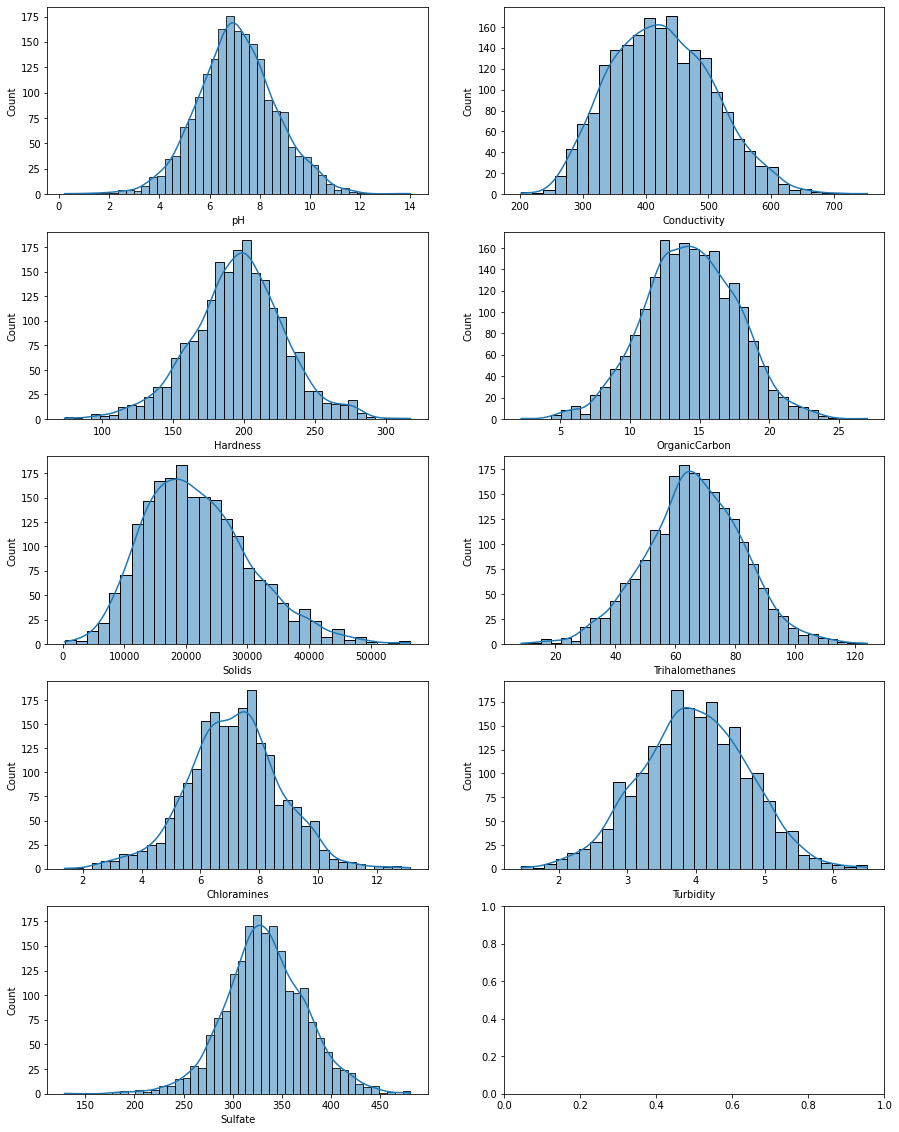

In [13]:
fig, axs = plt.subplots(5, 2, figsize=(15,20))
sns.histplot(water_potability["pH"], kde =True, ax=axs[0,0])
sns.histplot(water_potability["Hardness"], kde =True, ax=axs[1,0])
sns.histplot(water_potability["Solids"], kde =True, ax=axs[2,0])
sns.histplot(water_potability["Chloramines"], kde =True, ax=axs[3,0])
sns.histplot(water_potability["Sulfate"], kde =True, ax = axs[4,0])
sns.histplot(water_potability["Conductivity"], kde =True, ax=axs[0,1])
sns.histplot(water_potability["OrganicCarbon"], kde =True, ax=axs[1,1])
sns.histplot(water_potability["Trihalomethanes"], kde =True, ax=axs[2,1])
sns.histplot(water_potability["Turbidity"], kde =True, ax=axs[3,1])
plt.show()

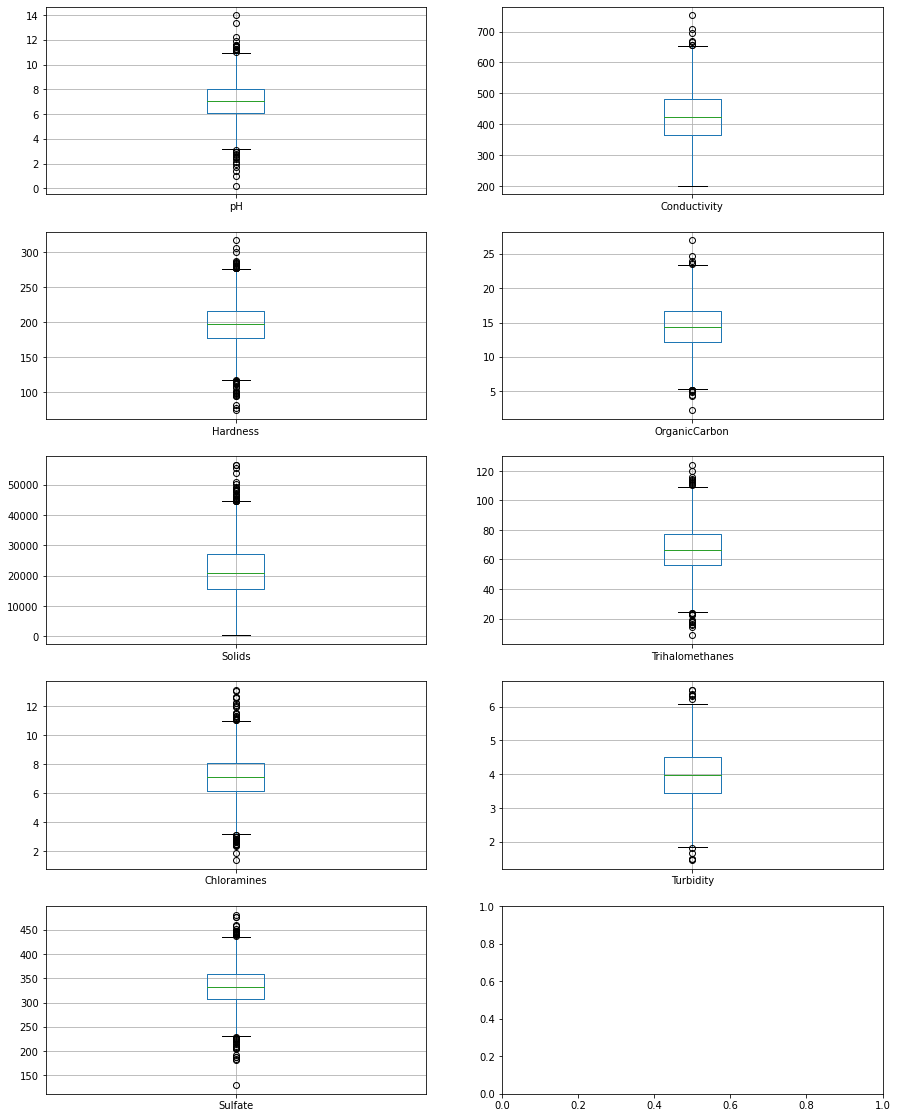

In [14]:
fig, axs = plt.subplots(5, 2, figsize=(15,20))
water_potability.boxplot("pH", ax=axs[0,0])
water_potability.boxplot("Hardness", ax=axs[1,0])
water_potability.boxplot("Solids", ax=axs[2,0])
water_potability.boxplot("Chloramines", ax=axs[3,0])
water_potability.boxplot("Sulfate", ax=axs[4,0])
water_potability.boxplot("Conductivity", ax=axs[0,1])
water_potability.boxplot("OrganicCarbon", ax=axs[1,1])
water_potability.boxplot("Trihalomethanes", ax=axs[2,1])
water_potability.boxplot("Turbidity", ax=axs[3,1])
plt.show()

Penjelasan No 2

##### 1. id

id hanyalah pembeda dari setiap row pada data, sehingga tidak perlu dilakukan visualisasi terhadap kolom id karena bukan kolom numerik

##### 2. pH

Histogram menunjukan bahwa distribusi kolom pH mendekati distribusi normal yang dapat dilihat juga kolom pH memiliki nilai skewness yang cukup kecil yaitu 0.048535. 
Berdasarkan Boxplot di atas dapat diketahui nilai minimum di sekitar 3, nilai Q1 di sekitar 6, nilai Q2 di sekitar 7, nilai Q3 di sekitar 8, dan nilai maksimum di sekitar 11. Pada boxplot didapatkan juga bahwa garis median tepat di tengah box, whisker atas boxplot sama panjang dengan whisker bawah, dan terdapat banyak outlier di bagian atas dan bawah boxplot.

##### 3. Hardness

Histogram menunjukan bahwa distribusi data kolom Hardness mendekati distribusi normal yang dapat dilihat juga kolom Hardness memiliki nilai skewness yang cukup kecil yaitu -0.085321.
Berdasarkan Boxplot di atas dapat diketahui nilai minimum di sekitar 118, nilai Q1 di sekitar 177, nilai Q2 atau median di sekitar 197, nilai Q3 di sekitar 216, dan nilai maksimum di sekitar 276. Pada boxplot didapatkan juga bahwa garis median tepat di tengah box dan whisker atas hampir sama panjang dengan whisker bawah dan terdapat banyak outlier di bagian atas dan bawah.

##### 4. Solids

Histogram menunjukan bahwa distribusi data kolom Solids cenderung skew positif yang dapat dilihat juga kolom Solids memiliki nilai skewness 0.591011. 
Berdasarkan Boxplot di atas dapat diketahui nilai minimum di sekitar 300, nilai Q1 di sekitar 16000, nilai Q2 atau median di sekitar 21000, nilai Q3 di sekitar 27000, dan nilai maksimum di sekitar 45000. Pada boxplot juga didapatkan bahwa garis median sedikit ke bawah box dan whisker atas sedikit lebih panjang dari whisker bawah dan terdapat banyak outlier(pencilan) di bagian atas.

##### 5. Chloramines

Histogram menunjukan bahwa distribusi data kolom Chloramines mendekati distribusi normal yang dapat dilihat juga kolom Chloramines memiliki nilai skewness 0.013003. 
Berdasarkan Boxplot di atas dapat diketahui nilai minimum di sekitar 3, nilai Q1 di sekitar 6, nilai Q2 atau median di sekitar 7, nilai Q3 di sekitar 8, dan nilai maksimum di sekitar 11. Pada boxplot didapatkan bahwa garis median tepat di tengah box dan whisker atas sama panjang dengan whisker bawah dan terdapat banyak outlier di bagian atas dan bawah.

##### 6. Sulfate

Histogram menunjukan bahwa distribusi data kolom Sulfate mendekati distribusi normal yang dapat dilihat juga kolom Sulfate memiliki nilai skewness -0.045728.
Berdasarkan Boxplot di atas dapat diketahui nilai minimum di sekitar 231, nilai Q1 di sekitar 307, nilai Q2 atau median di sekitar 332, nilai Q3 di sekitar 359, dan nilai maksimum di sekitar 436. Pada boxplot didapatkan juga bahwa garis median tepat di tengah box dan whisker atas sama panjang dengan whisker bawah dan terdapat banyak outlier(pencilan) di bagian atas dan bawah.

##### 7. Conductivity

Histogram menunjukan bahwa distribusi data kolom Conductivity sedikit skew positif yang dapat dilihat juga kolom Conductivity memiliki nilai skewness 0.268012.
Berdasarkan Boxplot di atas dapat diketahui nilai minimum di sekitar 202, nilai Q1 di sekitar 367, nilai Q2 atau median di sekitar 423, nilai Q3 di sekitar 482, dan nilai maksimum di sekitar 652. Pada boxplot didapatkan bahwa garis median tepat di tengah box dan whisker atas hampir sama panjang dengan whisker bawah dan terdapat outlier di bagian atas.

##### 8. OrganicCarbon

Histogram menunjukan bahwa distribusi data kolom OrganicCarbon mendekati distribusi normal yang dapat dilihat juga kolom OrganicCarbon memiliki nilai skewness -0.020220. 
Berdasarkan Boxplot di atas dapat diketahui nilai minimum di sekitar 5.3, nilai Q1 di sekitar 12,1, nilai Q2 atau median di sekitar 14,3, nilai Q3 di sekitar 16,7, dan nilai maksimum di sekitar 23,4. Pada boxplot didapatkan bahwa garis median tepat di tengah box dan whisker atas hampir sama panjang dengan whisker bawah dan terdapat sedikit outlier di atas dan bawah.

##### 9. Trihalomethanes

Histogram menunjukan menunjukan bahwa distribusi data kolom Trihalomethanes mendekati distribusi normal yang dapat dilihat juga kolom Trihalomethanes memiliki nilai skewness -0.051383
Berdasarkan Boxplot di atas dapat diketahui nilai minimum di sekitar 24.5, nilai Q1 di sekitar 56, nilai Q2 atau median di sekitar 66,4, nilai Q3 di sekitar 77,3, dan nilai maksimum di sekitar 108.9. Pada boxplot didapatkan bahwa garis median tepat di tengah box dan whisker atas sama panjang dengan whisker bawah dan terdapat sedikit outlier di atas dan bawah.

##### 10. Turbidity

Histogram menunjukan enunjukan bahwa distribusi data kolom Turbidity mendekati distribusi normal yang dapat dilihat juga kolom Turbidity memiliki nilai skewness -0.032266. 
Berdasarkan Boxplot di atas dapat diketahui nilai minimum di sekitar 1,8, nilai Q1 di sekitar 3,4, nilai Q2 atau median di sekitar 4, nilai Q3 di sekitar 4,5, dan nilai maksimum di sekitar 6. Pada boxplot didapatkan bahwa garis median tepat di tengah box dan whisker atas sama panjang dengan whisker bawah dan terdapat sedikit outlier di atas dan bawah.

##### 11. Potability

Potability hanya berisi nilai 1 dan 0, sehingga tidak perlu dilakukan visualisasi terhadap kolom Potability karena bukan merupakan kolom numerik

---
### 3. Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.

In [15]:
#digunakan normality test scipy
# berdasarkan perhitungan normality test
for i in columnsName:
    if(i != "id" and i != "Potability"):
        k2, p = scipy.stats.normaltest(water_potability[i])
        if (p < 0.05):
            print(i,"tidak terdistribusi normal")
        else:
            print(i,"terdistribusi normal")

pH tidak terdistribusi normal
Hardness tidak terdistribusi normal
Solids tidak terdistribusi normal
Chloramines tidak terdistribusi normal
Sulfate tidak terdistribusi normal
Conductivity tidak terdistribusi normal
OrganicCarbon terdistribusi normal
Trihalomethanes terdistribusi normal
Turbidity terdistribusi normal


---

##### 1. id

id hanyalah pembeda dari setiap row pada data, id bukanlah kolom numerik sehingga tidak dilakukan analisa / normality test

##### 2. pH

Berdasarkan histogram plotnya terlihat bahwa histrogam dapat diasumsikan terdistribusi normal. Tapi asumsi ini dibantah karena berdasarkan normality Test didapatkan kesimpulan data tidak terdistribusi normal hal ini dikarenakan data pH memiliki banyak pencilan di atas dan bawah pada boxplot. Sehingga kesimpulannnya data pada kolom pH tidak terdistribusi normal

##### 3. Hardness

Berdasarkan histogram plotnya terlihat bahwa histrogam dapat diasumsikan terdistribusi normal. Tapi asumsi ini dibantah karena berdasarkan normality Test didapatkan kesimpulan data tidak terdistribusi normal hal ini dikarenakan data Hardness memiliki banyak pencilan di atas dan bawah pada boxplot. Sehingga kesimpulannnya data pada kolom Hardness tidak terdistribusi normal

##### 4. Solids

Berdasarkan histogram plotnya terlihat bahwa histrogam dapat diasumsikan terdistribusi normal. Tapi asumsi ini dibantah karena berdasarkan normality Test didapatkan kesimpulan data tidak terdistribusi normal hal ini dikarenakan data Solids memiliki banyak pencilan di atas boxplot. Sehingga kesimpulannnya data pada kolom Solids tidak terdistribusi normal

##### 5. Chloramines

Berdasarkan histogram plotnya terlihat bahwa histrogam dapat diasumsikan tidak terdistribusi normal dikarenakan data cenderung skew positif dan mempunyai banyak outlier(pencilan) di atas bloxpot. hal ini diperkuat berdasarkan normality test didapatkan kesimpulan data tidak terdistribusi normal. Sehingga kesimpulannnya data pada kolom Chloramines tidak terdistribusi normal

##### 6. Sulfate

Berdasarkan histogram plotnya terlihat bahwa histrogam dapat diasumsikan terdistribusi normal. Tapi asumsi ini dibantah karena berdasarkan normality Test didapatkan kesimpulan data tidak terdistribusi normal hal ini dikarenakan data Sulfate memiliki banyak pencilan di atas dan bawah pada boxplot. Sehingga kesimpulannnya data pada kolom Sulfate tidak terdistribusi normal

##### 7. Conductivity

Berdasarkan histogram plotnya terlihat bahwa histrogam dapat diasumsikan tidak terdistribusi normal dikarenakan data cenderung skew positif dan mempunyai banyak outlier(pencilan) di atas bloxpot. hal ini diperkuat berdasarkan normality test didapatkan kesimpulan data tidak terdistribusi normal. Sehingga kesimpulannnya data pada kolom Conductivity tidak terdistribusi normal

##### 8. OrganicCarbon

Berdasarkan histogram plotnya terlihat bahwa histrogam dapat diasumsikan terdistribusi normal. hal ini diperkuat berdasarkan normality test didapatkan kesimpulan data terdistribusi normal. Sehingga kesimpulannnya data pada kolom OrganicCarbon terdistribusi normal

##### 9. Trihalomethanes

Berdasarkan histogram plotnya terlihat bahwa histrogam dapat diasumsikan terdistribusi normal. hal ini diperkuat berdasarkan normality test didapatkan kesimpulan data terdistribusi normal. Sehingga kesimpulannnya data pada kolom Trihalomethanes terdistribusi normal

##### 10. Turbidity

Berdasarkan histogram plotnya terlihat bahwa histrogam dapat diasumsikan terdistribusi normal. hal ini diperkuat berdasarkan normality test didapatkan kesimpulan data terdistribusi normal. Sehingga kesimpulannnya data pada kolom Turbidity terdistribusi normal

##### 11. Potability

Pada Potability data tidak tersebar merata(data hanya terdiri dari nilai 0 dan 1) dan bukan merupakan kolom numerik. Sehingga tidak perlu dilakukan analisa / normality test


Didapatkan data yang terdistribusi normal adalah OrganicCarbon, Trihalomethanes, dan Turbidity

---

### 4. Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian

**Enam Langkah Testing:** <br />
<br>
1. Tentukan Hipotesis nol (H0: θ = θ0), dimana θ bisa berupa μ, σ2, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.).
2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0 , θ < θ0 , atau θ ≠ θ0.
3. Tentukan tingkat signifikan α.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.
6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan

In [16]:
def Z_testStatistic(x̄,μ0,σ,root_n):
    return (float)(x̄-μ0)/(σ/root_n)
def Z_testStatistic_bigN(p̂,p0,q0,n):
    return (float)(p̂-p0)/np.sqrt(p0*q0/n)
def T_testStatistic(x̄,μ0,s,root_n):
    return (float)(x̄-μ0)/(s/root_n)

**Asumsi yang digunakan :** 
<br /> <br />
Sampel yang dicek sejumlah 2010 dimana 2010 data tersebut juga merupakan populasi (sampel yang dicek sekaligus populasi). Karena itu digunakan uji statistik distribusi Z untuk satu mean dengan standar deviasi populasi diketahui.

#### A. Nilai Rata-rata pH di atas 7? <br />

Nilai rata-rata pH di atas 7 ?
1. H0 : μ=7
2. H1 : μ>7
3. α = 0.05
4. Uji Statistik : z=(x̄-μ0)/(σ/root_n), σ diketahui
   Daerah Kritis : z>zα : z >1.645
5. Komputasi
   x̄ : 7.0871927687138285 
   root_n: 44.83302354291979 
   σ: 1.5728029470456655 
   μ0 : 7
   p_value : 0.006477571731867804 
   z: 2.485
6. Test Daerah Kritis
   Tolak H0 karena nilai uji = 2.485>1.645 (z>zα)
   Rata-Rata pH di atas 7


Text(0.5, 1.0, 'BoxPlot pH')

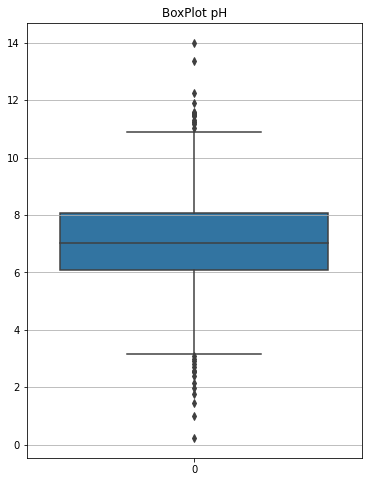

In [17]:
print("Nilai rata-rata pH di atas 7 ?")

# Langkah 1
H0 = "μ=7"
print("1. H0 : {}".format(H0))

# Langkah 2
H1 = "μ>7"
print("2. H1 : {}".format(H1))

# Langkah 3
α = 5e-2
print("3. α = {}".format(α))

# Langkah 4
zα = round(scipy.stats.norm.ppf(1-α),3)
print("4. Uji Statistik : z=(x̄-μ0)/(σ/root_n), σ diketahui")
print("   Daerah Kritis : z>zα : z >{}".format(zα))

# Langkah 5
x̄ = pH.mean()
μ0= 7
σ = pH.std()
root_n = np.sqrt(len(pH))
z = round(Z_testStatistic(x̄,μ0,σ,root_n),3)
p_value = 1-scipy.stats.norm.cdf(z)
print("5. Komputasi")
print("   x̄ : {} \n   root_n: {} \n   σ: {} \n   μ0 : {}".format(x̄,root_n,σ,μ0))
print("   p_value : {} \n   z: {}".format(str(p_value),str(z)))

# Langkah 6
print("6. Test Daerah Kritis")
if (z > zα):
    print("   Tolak H0 karena nilai uji = {}>{} (z>zα)".format(str(z),str(zα)))
    print("   Rata-Rata pH di atas 7")
else :
    print("   Terima H0 karena nilai uji = {}<={} (z<=zα)".format(str(z),str(zα)))
    print("   Rata-Rata pH sama dengan 7")

# Menggambar Boxplot pH

# Konfigurasi Boxplot
plt.figure(figsize=(6,8))
plt.grid()

# Penggambaran Boxplot
BoxPlotpH= sns.boxplot(data=pH)
BoxPlotpH.set_title("BoxPlot pH")


#### B.  Nilai Rata-rata Hardness tidak sama dengan 205? <br />

Nilai Rata-rata Hardness tidak sama dengan 205 ?
1. H0 : μ=205
2. H1 : μ≠205
3. α = 0.05
4. Uji Statistik : z=(x̄-μ0)/(σ/root_n), σ diketahui
   Daerah Kritis : z>zα/2 atau z <-zα/2 : z>1.96 atau z<-1.96
5. Komputasi
   x̄ : 195.96920903783524 
   n: 2010 
   root_n: 44.83302354291979 
   σ: 32.643165859429864 
   μ0 : 205
   p_value : 0.0 
   z: -12.403
6. Test Daerah Kritis
   Tolak H0 karena nilai uji = -12.403<-1.96 (z<-zα/2)
   Rata-rata Hardness tidak sama dengan 205


Text(0.5, 1.0, 'BoxPlot Hardness')

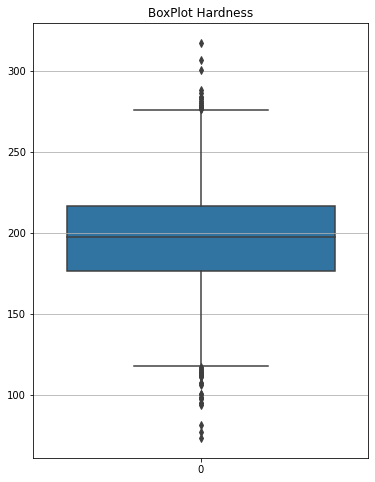

In [18]:
print("Nilai Rata-rata Hardness tidak sama dengan 205 ?")

# Langkah 1
H0 = "μ=205"
print("1. H0 : {}".format(H0))

# Langkah 2
H1 = "μ≠205"
print("2. H1 : {}".format(H1))

# Langkah 3
α = 5e-2
print("3. α = {}".format(α))

# Langkah 4
zα_div2 = round(scipy.stats.norm.ppf(1-(α/2)),3)
print("4. Uji Statistik : z=(x̄-μ0)/(σ/root_n), σ diketahui")
print("   Daerah Kritis : z>zα/2 atau z <-zα/2 : z>{} atau z<{}".format(zα_div2,-1*zα_div2))

# Langkah 5
x̄ = Hardness.mean()
μ0= 205
σ = Hardness.std()
n = len(Hardness)
root_n = np.sqrt(n)
z = round(Z_testStatistic(x̄,μ0,σ,root_n),3)
p_value = 1-abs(scipy.stats.norm.cdf(z)-scipy.stats.norm.cdf(-1*z))
print("5. Komputasi")
print("   x̄ : {} \n   n: {} \n   root_n: {} \n   σ: {} \n   μ0 : {}".format(x̄,n,root_n,σ,μ0))
print("   p_value : {} \n   z: {}".format(str(p_value),str(z)))

# Langkah 6
print("6. Test Daerah Kritis")
if (z > zα_div2 or z < -1*zα_div2):
    if (z > zα_div2):
        print("   Tolak H0 karena nilai uji = {}>{} (z>zα/2)".format(z,zα_div2))
    else:
        print("   Tolak H0 karena nilai uji = {}<{} (z<-zα/2)".format(z,-1*zα_div2))
    print("   Rata-rata Hardness tidak sama dengan 205")
else :
    print("   Terima H0 karena nilai uji = {}<{}<{} (-zα/2<z<zα/2)".format(-1*zα_div2,z,zα_div2))
    print("   Rata-rata Hardness sama dengan 205")
    
# Menggambar Boxplot Hardness

# Konfigurasi Boxplot
plt.figure(figsize=(6,8))
plt.grid()

# Penggambaran Boxplot
BoxPlotHardness= sns.boxplot(data=Hardness)
BoxPlotHardness.set_title("BoxPlot Hardness")

#### C. Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900? <br />

Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900 ?
1. H0 : μ=21900
2. H1 : μ≠21900
3. α = 0.05
4. Uji Statistik : z=(x̄-μ0)/(σ/root_n), σ diketahui
   Daerah Kritis : z>zα/2 atau z <-zα/2 : z>1.96 atau z<1.96
5. Komputasi
   x̄ : 22347.334446383426 
   root_n: 10.0 
   σ: 8625.397911190576 
   μ0 : 21900
   p_value : 0.6037607412507624 
   z: 0.519
6. Test Daerah Kritis
   Terima H0 karena nilai uji = -1.96<0.519<1.96 (-zα/2<z<zα/2)
   Nilai Rata-rata 100 baris pertama kolom Solids sama dengan 21900


Text(0.5, 1.0, 'BoxPlot newSolids')

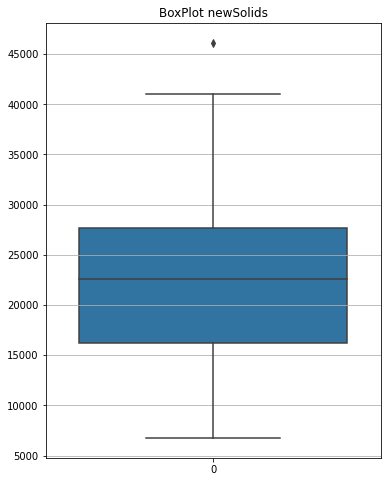

In [19]:
print("Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900 ?")
# Langkah 1
H0 = "μ=21900"
print("1. H0 : {}".format(H0))

# Langkah 2
H1 = "μ≠21900"
print("2. H1 : {}".format(H1))

# Langkah 3
α = 5e-2
print("3. α = {}".format(α))

# Langkah 4
zα_div2 = round(scipy.stats.norm.ppf(1-(α/2)),3)
print("4. Uji Statistik : z=(x̄-μ0)/(σ/root_n), σ diketahui")
print("   Daerah Kritis : z>zα/2 atau z <-zα/2 : z>{} atau z<{}".format(zα_div2,zα_div2))

# Langkah 5
newSolids = Solids[:100]
x̄ = newSolids.mean()
μ0= 21900
σ = Solids.std()
n = len(newSolids)
root_n = np.sqrt(n)
z = round(Z_testStatistic(x̄,μ0,σ,root_n),3)
p_value = 1-abs(scipy.stats.norm.cdf(z)-scipy.stats.norm.cdf(-1*z))
print("5. Komputasi")
print("   x̄ : {} \n   root_n: {} \n   σ: {} \n   μ0 : {}".format(x̄,root_n,σ,μ0))
print("   p_value : {} \n   z: {}".format(str(p_value),str(z)))

# Langkah 6
print("6. Test Daerah Kritis")
if (z > zα_div2 or z < -1*zα_div2):
    if (z > zα_div2):
        print("   Tolak H0 karena nilai uji = {}>{} (z>zα/2)".format(z,zα_div2))
    else:
        print("   Tolak H0 karena nilai uji = {}<{} (z<-zα/2)".format(z,-1*zα_div2))
    print("   Nilai Rata-rata 100 baris pertama kolom Solids tidak sama dengan 21900")
else :
    print("   Terima H0 karena nilai uji = {}<{}<{} (-zα/2<z<zα/2)".format(-1*zα_div2,z,zα_div2))
    print("   Nilai Rata-rata 100 baris pertama kolom Solids sama dengan 21900")

# Menggambar Boxplot Solids

# Konfigurasi Boxplot
plt.figure(figsize=(6,8))
plt.grid()
# Penggambaran Boxplot
BoxPlotSolids= sns.boxplot(data=newSolids)
BoxPlotSolids.set_title("BoxPlot newSolids")

#### D. Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%? <br />

Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10% ?
1. H0 : p=0.10
2. H1 : p≠0.10
3. α = 0.05
4. Uji Statistik : z=(p̂-p0)/sqrt(p0*q0/n), σ diketahui
   Daerah Kritis : z>zα/2 atau z <-zα/2 : z>1.96 atau z<1.96
5. Komputasi
   p̂ : 0.3706467661691542 
   p0: 0.1 
   q0: 0.9 
   n : 2010
   p_value : 0.0 
   z: 40.446
6. Test Daerah Kritis
   Tolak H0 karena nilai uji = 40.446>1.96 (z>zα/2)
   Proporsi nilai Conductivity yang lebih dari 450 tidak sama dengan 10%


Text(0.5, 1.0, 'BoxPlot Conductivity')

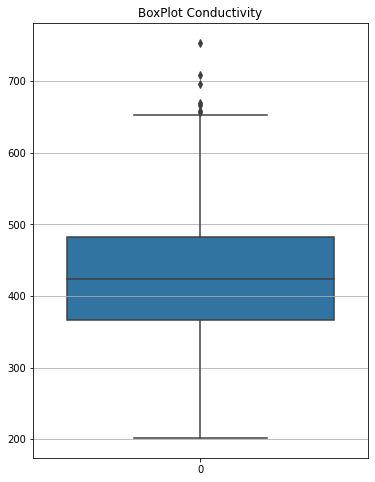

In [20]:
print("Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10% ?")
# Langkah 1
H0 = "p=0.10"
print("1. H0 : {}".format(H0))

# Langkah 2
H1 = "p≠0.10"
print("2. H1 : {}".format(H1))

# Langkah 3
α = 5e-2
print("3. α = {}".format(α))

# Langkah 4

zα_div2 = round(scipy.stats.norm.ppf(1-(α/2)),3)
print("4. Uji Statistik : z=(p̂-p0)/sqrt(p0*q0/n), σ diketahui")
print("   Daerah Kritis : z>zα/2 atau z <-zα/2 : z>{} atau z<{}".format(zα_div2,zα_div2))

# Langkah 5
newConductivity = [dia for dia in Conductivity if dia > 450]
p̂ = len(newConductivity)/len(Conductivity)
p0 = 0.10
q0 = 1-p0
n = len(Conductivity)
z = round(Z_testStatistic_bigN(p̂,p0,q0,n),3)
p_value = 1-abs(scipy.stats.norm.cdf(z)-scipy.stats.norm.cdf(-1*z))
print("5. Komputasi")
print("   p̂ : {} \n   p0: {} \n   q0: {} \n   n : {}".format(p̂,p0,q0,n))
print("   p_value : {} \n   z: {}".format(str(p_value),str(z)))

# Langkah 6
print("6. Test Daerah Kritis")
if (z > zα_div2 or z < -1*zα_div2):
    if (z > zα_div2):
        print("   Tolak H0 karena nilai uji = {}>{} (z>zα/2)".format(z,zα_div2))
    else:
        print("   Tolak H0 karena nilai uji = {}<{} (z<-zα/2)".format(z,-1*zα_div2))
    print("   Proporsi nilai Conductivity yang lebih dari 450 tidak sama dengan 10%")
else :
    print("   Terima H0 karena nilai uji = {}<{}<{} (-zα/2<z<zα/2)".format(-1*zα_div2,z,zα_div2))
    print("   Proporsi nilai Conductivity yang lebih dari 450 sama dengan 10%")

    
# Menggambar Boxplot Conductivity

# Konfigurasi Boxplot
plt.figure(figsize=(6,8))
plt.grid()

# Penggambaran Boxplot
BoxPlotConductivity= sns.boxplot(data=Conductivity)
BoxPlotConductivity.set_title("BoxPlot Conductivity")

#### E. Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%? <br />

Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5% ?
1. H0 : p=0.05
2. H1 : p<0.05
3. α = 0.05
4. Uji Statistik : z=(p̂-p0)/sqrt(p0*q0/n), σ diketahui
   Daerah Kritis : z <-zα : z<-1.645
5. Komputasi
   p̂ : 0.0527363184079602 
   p0: 0.05 
   q0: 0.95 
   n : 2010
   p_value : 0.7132825580297869 
   z: 0.563
6. Test Daerah Kritis
   Terima H0 karena nilai uji = 0.563>=-1.645 (z>=-zα)
   Proporsi nilai Trihalomethanes yang kurang dari 40, adalah sama dengan 5%


Text(0.5, 1.0, 'BoxPlot Trihalomethanes')

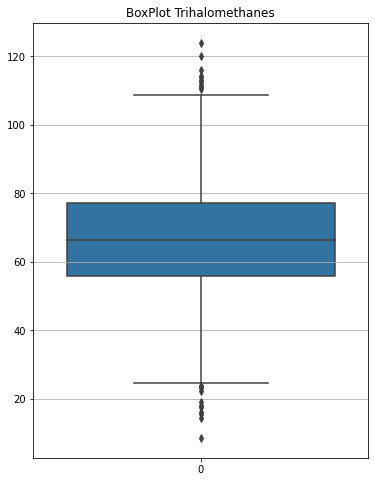

In [21]:
print("Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5% ?")

# Langkah 1
H0 = "p=0.05"
print("1. H0 : {}".format(H0))

# Langkah 2
H1 = "p<0.05"
print("2. H1 : {}".format(H1))

# Langkah 3
α = 5e-2
print("3. α = {}".format(α))

# Langkah 4
zα = round(scipy.stats.norm.ppf(1-α),3)
print("4. Uji Statistik : z=(p̂-p0)/sqrt(p0*q0/n), σ diketahui")
print("   Daerah Kritis : z <-zα : z<{}".format(-1*zα))

# Langkah 5
newKel = [kel for kel in Trihalomethanes if kel < 40]
p̂ = len(newKel)/len(Trihalomethanes)
p0 = 0.05
q0 = 1-p0
n = len(Trihalomethanes)
z = round(Z_testStatistic_bigN(p̂,p0,q0,n),3)
p_value = scipy.stats.norm.cdf(z)
print("5. Komputasi")
print("   p̂ : {} \n   p0: {} \n   q0: {} \n   n : {}".format(p̂,p0,q0,n))
print("   p_value : {} \n   z: {}".format(str(p_value),str(z)))

# Langkah 6
print("6. Test Daerah Kritis")
if (z < -1*zα):
    print("   Tolak H0 karena nilai uji = {}<{} (z<-zα)".format(str(z),str(-1*zα)))
    print("   Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%")
else :
    print("   Terima H0 karena nilai uji = {}>={} (z>=-zα)".format(str(z),str(-zα)))
    print("   Proporsi nilai Trihalomethanes yang kurang dari 40, adalah sama dengan 5%")
    
# Menggambar Boxplot Trihalomethanes

# Konfigurasi Boxplot
plt.figure(figsize=(6,8))
plt.grid()

# Penggambaran Boxplot
BoxPlotTrihalomethanes= sns.boxplot(data=Trihalomethanes)
BoxPlotTrihalomethanes.set_title("BoxPlot Trihalomethanes")

---

### 5. Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.
<ul>
a. Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah
rata-rata kedua bagian tersebut sama?
<br>
b. Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom.
Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?
<br>
c. Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?
<br>
d. Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada,
proporsi nilai yang sama di bagian akhir Turbidity ?
<br>
e. Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?
</ul>

##### a. Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

1. Hipotesis Nol
$$H_0 : \mu_{SulfateAwal} = \mu_{SulfateAkhir}$$

2. Hipotesis Alternatif
$$H_1 : \mu_{SulfateAwal} \not= \mu_{SulfateAkhir}$$

3. Tingkat Signifikan $\alpha$
$$\alpha = 0.05$$

4. Uji Statistik dan Daerah Kritis
<br />
Derajat Kebebasan = 2008
<br />
Asumsi kolom Sulfate berdistribusi normal maka didapatkan nilai kritis t' < -1.961 atau t' > 1.961

In [22]:
SulfateAwal = water_potability.iloc[:water_potability['Sulfate'].count()//2,:]
SulfateAkhir = water_potability.iloc[water_potability['Sulfate'].count()//2:,:]
print("5. Perhitungan Nilai Uji Statistik dari Data Sample")
printM("$\\bar{X}_{SulfateAwal} = "+ str(SulfateAwal['Sulfate'].mean()) +  "$")
printM("$\\bar{X}_{SulfateAkhir} = " + str(SulfateAkhir['Sulfate'].mean()) +"$")
printM("$S^2_{SulfateAwal} = "+ str(SulfateAwal['Sulfate'].var()) +  "$")
printM("$S^2_{SulfateAkhir} = " + str(SulfateAkhir['Sulfate'].var()) +"$")
Sp = ((len(SulfateAwal['Sulfate'])-1)*SulfateAwal['Sulfate'].var()+(len(SulfateAkhir['Sulfate']-1))*SulfateAkhir['Sulfate'].var())/(len(SulfateAwal['Sulfate'])+len(SulfateAkhir['Sulfate'])-2)
printM("$S^2_{p} = " + str(Sp) +"$")
printM("$n_{SulfateAwal} =" + str(len(SulfateAwal['Sulfate'])) +",\\, n_{SulfateAkhir} ="+ str(len(SulfateAwal['Sulfate'])) + "$")
printM("$t' = \\Large\\frac{(\\bar{X}_{SulfateAwal} - \\bar{X}_{SulfateAkhir})-d_0}{S_{p}\\sqrt{\\Large\\frac{1}{\\Large n_{SulfateAwal}} + \\Large\\frac{1}{\\Large n_{SulfateAkhir}}}}$")
printM("dengan $d_0 = \\mu_{SulfateAwal} - \\mu_{SulfateAkhir} = 0$")
t=((SulfateAwal['Sulfate'].mean() - SulfateAkhir['Sulfate'].mean()) - 0)/((((1/len(SulfateAwal['Sulfate'])) + (1/len(SulfateAwal['Sulfate'])))*Sp)**0.5)
dk = len(SulfateAwal['Sulfate'])+len(SulfateAkhir['Sulfate']) - 2
printM("didapat **t' = "+str(t)+"**")
printM("didapat **P-Value = "+ str(scipy.stats.t.sf(abs(t), dk)*2) + "**")

5. Perhitungan Nilai Uji Statistik dari Data Sample


$\bar{X}_{SulfateAwal} = 331.30532950549565$

$\bar{X}_{SulfateAkhir} = 335.11742332488245$

$S^2_{SulfateAwal} = 1708.3966020772502$

$S^2_{SulfateAkhir} = 1682.7330644425087$

$S^2_{p} = 1696.4028477342033$

$n_{SulfateAwal} =1005,\, n_{SulfateAkhir} =1005$

$t' = \Large\frac{(\bar{X}_{SulfateAwal} - \bar{X}_{SulfateAkhir})-d_0}{S_{p}\sqrt{\Large\frac{1}{\Large n_{SulfateAwal}} + \Large\frac{1}{\Large n_{SulfateAkhir}}}}$

dengan $d_0 = \mu_{SulfateAwal} - \mu_{SulfateAkhir} = 0$

didapat **t' = -2.0747564201266155**

didapat **P-Value = 0.03813621568882176**

##### 6. Kesimpulan
Karena nilai t' terletak di titik kritis $t'<-1,961$ maka $H_0$ ditolak P-value yang didapatkan juga lebih kecil dibanding tingkat sinifikansi  yang diinginkan. Sehingga, didapatkan kesimpulan **rata-rata bagian awal dan bagian akhir kolom Sulfate tidak sama**.

<AxesSubplot:>

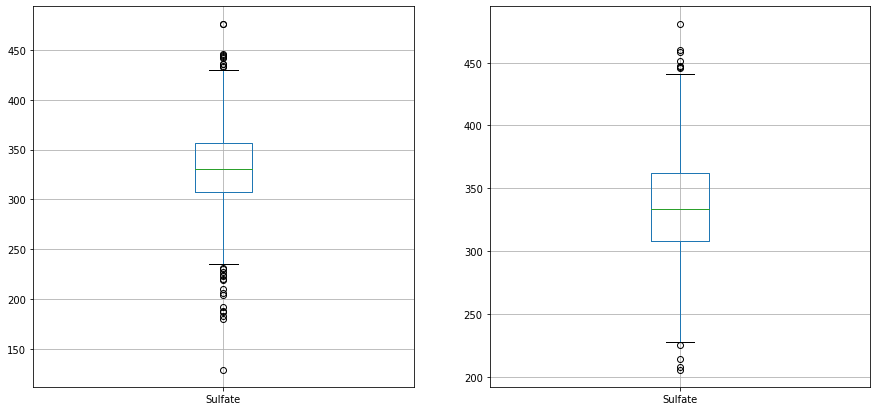

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
SulfateAwal.boxplot("Sulfate", ax=axs[0])
SulfateAkhir.boxplot("Sulfate", ax=axs[1])
# boxplot kiri merupakan Sulfate awal, kanan Sulfate akhir

##### b. Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?

1. Hipotesis Nol
$$H_0 : \mu_{OrganicCarbonAwal} = \mu_{OrganicCarbonAkhir} + 0.15$$

2. Hipotesis Alternatif
$$H_1 : \mu_{OrganicCarbonAwal} \not= \mu_{OrganicCarbonAkhir} + 0.15$$

3. Tingkat Signifikan $\alpha$
$$\alpha = 0.05$$

4. Uji Statistik dan Daerah Kritis
<br>
Derajat Kebebasan = 2008
<br>
Asumsi kolom OrganicCarbon berdistribusi normal maka didapatkan nilai kritis t' < -1.961 atau t' > 1.961

In [24]:
OrganicCarbonAwal = water_potability.iloc[:water_potability['OrganicCarbon'].count()//2,:]
OrganicCarbonAkhir = water_potability.iloc[water_potability['OrganicCarbon'].count()//2:,:]
print("5. Perhitungan Nilai Uji Statistik dari Data Sample")
printM("$\\bar{X}_{OrganicCarbonAwal} = "+ str(OrganicCarbonAwal['OrganicCarbon'].mean()) +  "$")
printM("$\\bar{X}_{OrganicCarbonAkhir} = " + str(OrganicCarbonAkhir['OrganicCarbon'].mean()) +"$")
printM("$S^2_{OrganicCarbonAwal} = "+ str(OrganicCarbonAwal['OrganicCarbon'].var()) +  "$")
printM("$S^2_{OrganicCarbonAkhir} = " + str(OrganicCarbonAkhir['OrganicCarbon'].var()) +"$")
Sp = ((len(OrganicCarbonAwal['OrganicCarbon'])-1)*OrganicCarbonAwal['OrganicCarbon'].var()+(len(OrganicCarbonAkhir['OrganicCarbon']-1))*OrganicCarbonAkhir['OrganicCarbon'].var())/(len(OrganicCarbonAwal['OrganicCarbon'])+len(OrganicCarbonAkhir['OrganicCarbon'])-2)
printM("$S^2_{p} = " + str(Sp) +"$")
printM("$n_{OrganicCarbonAwal} =" + str(len(OrganicCarbonAwal['OrganicCarbon'])) +",\\, n_{OrganicCarbonAkhir} ="+ str(len(OrganicCarbonAwal['OrganicCarbon'])) + "$")
printM("$t' = \\Large\\frac{(\\bar{X}_{OrganicCarbonAwal} - \\bar{X}_{OrganicCarbonAkhir})-d_0}{S_{p}\\sqrt{\\Large\\frac{1}{\\Large n_{OrganicCarbonAwal}} + \\Large\\frac{1}{\\Large n_{OrganicCarbonAkhir}}}}$")
printM("dengan $d_0 = \\mu_{OrganicCarbonAwal} - \\mu_{OrganicCarbonAkhir} = 0.15$")
t =((OrganicCarbonAwal['OrganicCarbon'].mean() - OrganicCarbonAkhir['OrganicCarbon'].mean()) - 0.15)/(((1/len(OrganicCarbonAwal['OrganicCarbon']) + 1/len(OrganicCarbonAwal['OrganicCarbon']))*Sp)**0.5)
dk = len(OrganicCarbonAwal['OrganicCarbon'])+len(OrganicCarbonAkhir['OrganicCarbon']) - 2
printM("didapat **t' = "+str(t)+"**")
printM("didapat **P-Value = "+ str(scipy.stats.t.sf(abs(t), dk)*2) + "**")

5. Perhitungan Nilai Uji Statistik dari Data Sample


$\bar{X}_{OrganicCarbonAwal} = 14.253972723723393$

$\bar{X}_{OrganicCarbonAkhir} = 14.461907080372756$

$S^2_{OrganicCarbonAwal} = 11.230287224380323$

$S^2_{OrganicCarbonAkhir} = 10.880581782847479$

$S^2_{p} = 11.06085312003962$

$n_{OrganicCarbonAwal} =1005,\, n_{OrganicCarbonAkhir} =1005$

$t' = \Large\frac{(\bar{X}_{OrganicCarbonAwal} - \bar{X}_{OrganicCarbonAkhir})-d_0}{S_{p}\sqrt{\Large\frac{1}{\Large n_{OrganicCarbonAwal}} + \Large\frac{1}{\Large n_{OrganicCarbonAkhir}}}}$

dengan $d_0 = \mu_{OrganicCarbonAwal} - \mu_{OrganicCarbonAkhir} = 0.15$

didapat **t' = -2.412554355813619**

didapat **P-Value = 0.015930288341907173**

##### 6. Kesimpulan
Karena nilai t' terletak di titik kritis $t'<-1,961$ maka $H_0$ ditolak. P-value yang didapatkan juga lebih kecil dibanding tingkat signifikansi $\alpha$ yang diinginkan. Sehingga, didapatkan kesimpulan **rata-rata bagian awal dan bagian akhir kolom OrganicCarbon tidak sama**.

<AxesSubplot:>

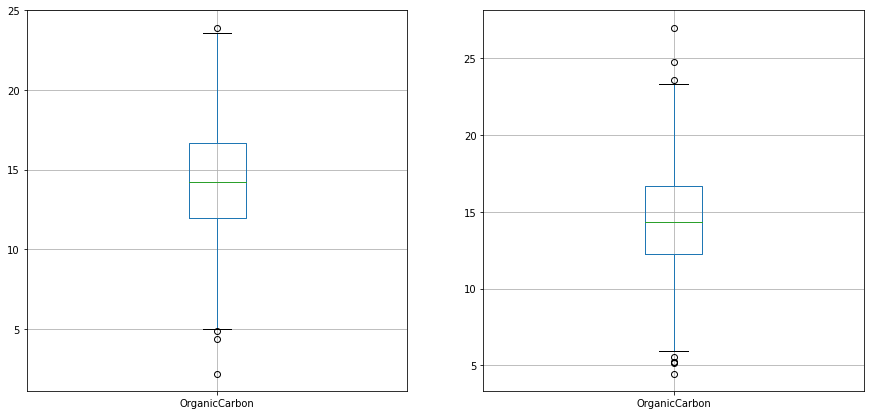

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
OrganicCarbonAwal.boxplot("OrganicCarbon", ax=axs[0])
OrganicCarbonAkhir.boxplot("OrganicCarbon", ax=axs[1])
# boxplot kiri merupakan OrganicCarbon awal, kanan OrganicCarbon akhir

##### c. Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?

1. Hipotesis Nol
$$H_0 : \mu_{ChloraminesAwal} = \mu_{ChloraminesAkhir}$$

2. Hipotesis Alternatif
$$H_1 : \mu_{ChloraminesAwal} \not= \mu_{ChloraminesAkhir}$$

3. Tingkat Signifikan $\alpha$
$$\alpha = 0.05$$

4. Uji Statistik dan Daerah Kritis
<br>
Derajat Kebebasan = 100 + 100 - 2 = 198
<br>
Asumsi kolom Chloramines berdistribusi normal maka didapatkan nilai kritis t' < -1.972 atau t' > 1.972

In [26]:
ChloraminesAwal = water_potability.iloc[:100,:]
ChloraminesAkhir = water_potability.iloc[-100:,:]
print("5. Perhitungan Nilai Uji Statistik dari Data Sample")
printM("$\\bar{X}_{ChloraminesAwal} = "+ str(ChloraminesAwal['Chloramines'].mean()) +  "$")
printM("$\\bar{X}_{ChloraminesAkhir} = " + str(ChloraminesAkhir['Chloramines'].mean()) +"$")
printM("$S^2_{ChloraminesAwal} = "+ str(ChloraminesAwal['Chloramines'].var()) +  "$")
printM("$S^2_{ChloraminesAkhir} = " + str(ChloraminesAkhir['Chloramines'].var()) +"$")
Sp = ((len(ChloraminesAwal['Chloramines'])-1)*ChloraminesAwal['Chloramines'].var()+(len(ChloraminesAkhir['Chloramines']-1))*ChloraminesAkhir['Chloramines'].var())/(len(ChloraminesAwal['Chloramines'])+len(ChloraminesAkhir['Chloramines'])-2)
printM("$S^2_{p} = " + str(Sp) +"$")
printM("$n_{ChloraminesAwal} =" + str(len(ChloraminesAwal['Chloramines'])) +",\\, n_{ChloraminesAkhir} ="+ str(len(ChloraminesAwal['Chloramines'])) + "$")
printM("$t' = \\Large\\frac{(\\bar{X}_{ChloraminesAwal} - \\bar{X}_{ChloraminesAkhir})-d_0}{S_{p}\\sqrt{\\Large\\frac{1}{\\Large n_{ChloraminesAwal}} + \\Large\\frac{1}{\\Large n_{ChloraminesAkhir}}}}$")
printM("dengan $d_0 = \\mu_{ChloraminesAwal} - \\mu_{ChloraminesAkhir} = 0$")
t = ((ChloraminesAwal['Chloramines'].mean() - ChloraminesAkhir['Chloramines'].mean()) - 0)/(((1/len(ChloraminesAwal['Chloramines']) + 1/len(ChloraminesAwal['Chloramines']))*Sp)**0.5)
dk = len(ChloraminesAwal['Chloramines'])+len(ChloraminesAkhir['Chloramines']) - 2
printM("didapat **t' = "+str(t)+"**")
printM("didapat **P-Value = "+ str(scipy.stats.t.sf(abs(t), dk)*2) + "**")

5. Perhitungan Nilai Uji Statistik dari Data Sample


$\bar{X}_{ChloraminesAwal} = 7.007771140423921$

$\bar{X}_{ChloraminesAkhir} = 7.147197636249925$

$S^2_{ChloraminesAwal} = 2.193041986248721$

$S^2_{ChloraminesAkhir} = 1.7077427735538262$

$S^2_{p} = 1.9590173434040707$

$n_{ChloraminesAwal} =100,\, n_{ChloraminesAkhir} =100$

$t' = \Large\frac{(\bar{X}_{ChloraminesAwal} - \bar{X}_{ChloraminesAkhir})-d_0}{S_{p}\sqrt{\Large\frac{1}{\Large n_{ChloraminesAwal}} + \Large\frac{1}{\Large n_{ChloraminesAkhir}}}}$

dengan $d_0 = \mu_{ChloraminesAwal} - \mu_{ChloraminesAkhir} = 0$

didapat **t' = -0.7043867438713249**

didapat **P-Value = 0.48201960658934917**

##### 6. Kesimpulan
Karena nilai t' diluar titik kritis maka $H_0$ diterima. P-value yang didapatkan juga lebih besar dibanding tingkat sinifikansi $\alpha$ yang diinginkan. Sehingga, didapatkan kesimpulan **rata-rata 100 bagian awal dan 100 bagian akhir kolom Chloramines sama**.

<AxesSubplot:>

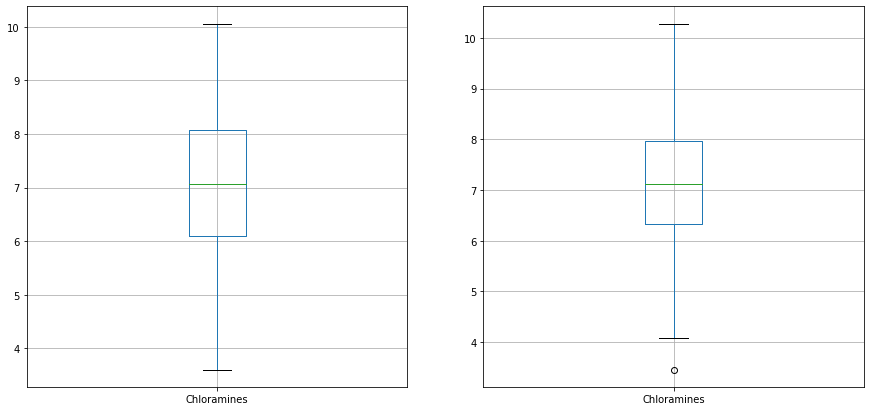

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
ChloraminesAwal.boxplot("Chloramines", ax=axs[0])
ChloraminesAkhir.boxplot("Chloramines", ax=axs[1])
# boxplot kiri merupakan Chloramines awal, kanan Chloramines akhir

##### d. Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Turbidity ?

1. Hipotesis Nol
$$H_0 : P(X_{1}>4) = P(X_{2}>4)$$

2. Hipotesis Alternatif
$$H_1 : P(X_{1}>4) > P(X_{2}>4)$$

3. Tingkat Signifikan $\alpha$
$$\alpha = 0.05$$

4. Uji Statistik dan Daerah Kritis
<br>
Asumsi kolom Turbidity berdistribusi normal maka didapatkan nilai kritis Z > 1.645

In [28]:
TurbidityAwal = water_potability.iloc[:water_potability['Turbidity'].count()//2,:]
TurbidityAkhir = water_potability.iloc[water_potability['Turbidity'].count()//2:,:]
jumlahAwal = 0
jumlahAkhir= 0
for i in range(len(TurbidityAwal)):
    if (TurbidityAwal["Turbidity"][i] > 4):
        jumlahAwal += 1
for i in range(len(TurbidityAkhir)):
    if (TurbidityAkhir["Turbidity"][i+len(TurbidityAwal)] > 4):
        jumlahAkhir+= 1

print("5. Perhitungan nilai uji statistik dan p-value")
printM("$\\hat{p} = \\Large\\frac{x}{n}$")
p1 = jumlahAwal/len(TurbidityAwal)
p2 = jumlahAkhir/len(TurbidityAkhir)
printM("$\\hat{p}_1 = " + f"{p1}$")
printM("$\\hat{p}_2 = " + f"{p2}$")
printM("$\\bar{p}=\\Large\\frac{x_1 + x_2}{n_1 + n_2}$")
p = (jumlahAwal + jumlahAkhir)/(len(TurbidityAwal)+len(TurbidityAkhir))
q = 1-p
printM("$\\bar{p} = " + f"{p}$")
printM("$z=\\Large\\frac{\\hat{p}_1-\\hat{p}_2}{\\sqrt{\\bar{p}(1-\\bar{p})(\\frac{1}{n_1}+\\frac{1}{n_2})}}$")
z = (p1 - p2)/((p*(1-p)*(1/len(TurbidityAwal) + 1/len(TurbidityAkhir)))**0.5)
printM("didapat **z = "+f"{z}**")
pZ = scipy.stats.norm.sf(z)
printM("**P-value = "+f"{pZ}**")

5. Perhitungan nilai uji statistik dan p-value


$\hat{p} = \Large\frac{x}{n}$

$\hat{p}_1 = 0.4835820895522388$

$\hat{p}_2 = 0.48656716417910445$

$\bar{p}=\Large\frac{x_1 + x_2}{n_1 + n_2}$

$\bar{p} = 0.48507462686567165$

$z=\Large\frac{\hat{p}_1-\hat{p}_2}{\sqrt{\bar{p}(1-\bar{p})(\frac{1}{n_1}+\frac{1}{n_2})}}$

didapat **z = -0.13388958661778735**

**P-value = 0.5532550575911831**

##### 6.Kesimpulan
Karena nilai t' diluar titik kritis maka $H_0$ diterima, P-value yang didapatkan juga lebih besar dibanding tingkat sinifikansi  yang diinginkan. maka **Proporsi nilai bagian awal Turbidity yang lebih dari 4, tidak lebih besar daripada, proporsi nilai yang sama di bagian akhir Turbidity**.

<AxesSubplot:>

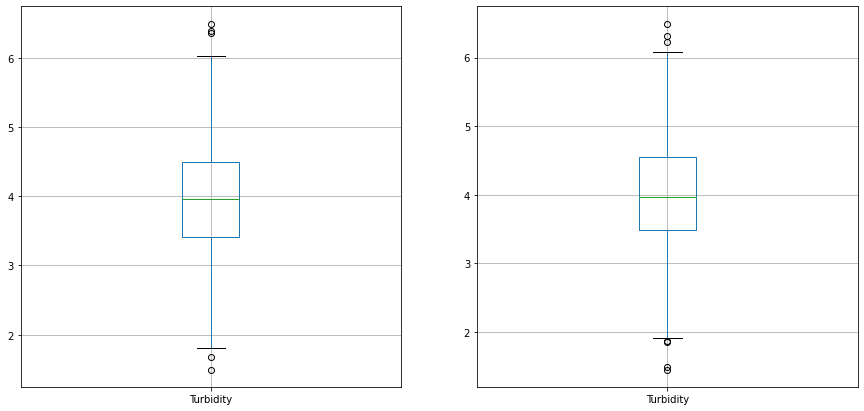

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
TurbidityAwal.boxplot("Turbidity", ax=axs[0])
TurbidityAkhir.boxplot("Turbidity", ax=axs[1])
# boxplot kiri merupakan Turbidity awal, kanan Turbidity akhir

##### e. Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?

1. Hipotesis Nol
$$H_0 : \sigma_{SulfateAwal} = \sigma_{SulfateAkhir}$$

2. Hipotesis Alternatif
$$H_1 : \sigma_{SulfateAwal} \not= \sigma_{SulfateAkhir}$$

3. Tingkat Signifikan $\alpha$
$$\alpha = 0.05$$

4. Uji Statistik dan Daerah Kritis
<br>
Derajat Kebebasan awal = 1005 - 1 = 1004
<br>
Derajat Kebebasan akhir = 1005 - 1 = 1004
<br>
Asumsi kolom Sulfate berdistribusi normal maka didapatkan nilai kritis dengan uji test distribusi F adalah $0 < f \le 0.8836$ dan $f\ge1.1318$

In [30]:
print("5. Perhitungan Nilai Uji Statistik dari Data Sample")
SulfateAwal = water_potability.iloc[:water_potability['Sulfate'].count()//2,:]
SulfateAkhir = water_potability.iloc[water_potability['Sulfate'].count()//2:,:]
printM("$S^2_{SulfateAwal} = "+ str(SulfateAwal['Sulfate'].var()) +  "$")
printM("$S^2_{SulfateAkhir} = " + str(SulfateAkhir['Sulfate'].var()) +"$")
printM("$f = \\Large\\frac{s^2_{DiameterAwal}}{s^2_{DiameterAkhir}}$")
f = SulfateAwal['Sulfate'].var()/SulfateAkhir['Sulfate'].var()
printM("$f = " + f"{f}$")
pF = scipy.stats.f.sf(f, len(SulfateAwal), len(SulfateAkhir))*2
printM("**P-value = "+f"{pF}**")

5. Perhitungan Nilai Uji Statistik dari Data Sample


$S^2_{SulfateAwal} = 1708.3966020772502$

$S^2_{SulfateAkhir} = 1682.7330644425087$

$f = \Large\frac{s^2_{DiameterAwal}}{s^2_{DiameterAkhir}}$

$f = 1.0152511043950063$

**P-value = 0.8104407122629728**

##### 6. Kesimpulan
Nilai f yang didapat tidak terletak pada titik kritis, $0 < f \le 0.8836$ dan $f\ge1.1318$ maka $H_{0}$ diterima. value yang didapatkan juga lebih besar dibanding tingkat sinifikansi $\alpha$ yang diinginkan. Sehingga, dapat disimpulkan **bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya**.

<AxesSubplot:>

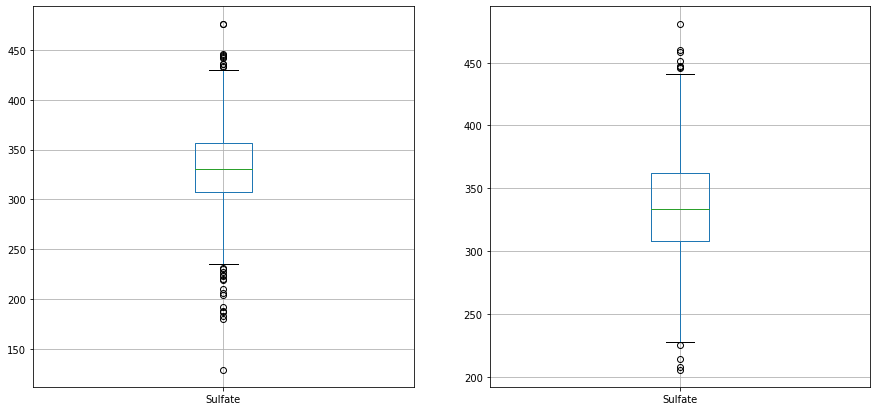

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
SulfateAwal.boxplot("Sulfate", ax=axs[0])
SulfateAkhir.boxplot("Sulfate", ax=axs[1])
# boxplot kiri merupakan Sulfate awal, kanan Sulfate akhir

---
### 6. Test korelasi: tentukan apakah setiap kolom non-target berkorelasi dengan kolom target, dengan menggambarkan juga scatter plot nya. Gunakan correlation test.
Adapun daftar kolom non-target adalah sebagai berikut.
1. pH
2. Hardness
3. Solids
4. Chloramines
5. Sulfate
6. Conductivity
7. OrganicCarbon
8. Trihalomethanes
9. Turbidity

Sedangkan kolom target hanyalah Potability.

Adapun metode yang digunakan adalah sebagai berikut.
1. Melakukan tes korelasi dengan metode Pearson
    - H0 : p = 0 (Tidak ada korelasi antara kolom target dan kolom non-target)
    - H1 : p ≠ 0 (Ada korelasi antara kolom target dan kolom non-target)
<br><br>
2. Jika terdapat korelasi diantara kolom non-target dan kolom target maka cari berapa koefisien korelasi diantara kedua kolom tersebut. Beberapa kesimpulan yang dapat diambil sebagai berikut :
    - 0 < Koefisien Korelasi < 1 (Positive Correlation)
    - Koefisien Korelasi = 1 (Strong Positive Correlation)
    - -1 < Koefisien Korelasi < 0 (Negative Correlation)
    - Koefisien Korelasi = -1 (Strong Negative Correlation)
    - Koefisien Korelasi = 0 (No Correlation)
<br><br>
3. Tampilkan Scatter Plot di antara dua kolom tersebut

In [32]:
# Deklarasi dataframe kolom Potability

Potability = water_potability["Potability"]

In [33]:
# Deklarasi Procedure
def testCorelation(column):
    if column == 'pH':
        test = pH
    elif column == 'Hardness':
        test = Hardness
    elif column == 'Solids':
        test = Solids
    elif column == 'Chloramines':
        test = Chloramines
    elif column == 'Sulfate':
        test = Sulfate
    elif column == 'Conductivity':
        test = Conductivity
    elif column == 'OrganicCarbon':
        test = OrganicCarbon
    elif column == 'Trihalomethanes':
        test = Trihalomethanes
    else:
        test = Turbidity

    display(Markdown("#### Kesimpulan : <br>"))
    stat, p = scipy.stats.pearsonr(test, Potability)
    isCorelating = True
    if p == 0:
        print("H0 tidak bisa ditolak, sehingga tidak ada korelasi antara kolom {} (non-target) dan kolom Potability (target).".format(column))
        isCorelating = False
    else:
        print("H0 ditolak, sehingga ada korelasi antara kolom {} (non-target) dan kolom Potability (target).".format(column))
    # Koefisien Korelasi
    if (isCorelating):
        koefColumn = test.corr(Potability, method='pearson')
        print("Koefisien korelasi : {}.". format(koefColumn))
        if (koefColumn > 0 and koefColumn < 1):
            print("Jenis korelasi : Positive Correlation.")
            print("Sehingga nilai {} yang lebih besar akan dikategorikan pada potability yang lebih besar atau sebaliknya. ".format(column))
        elif (koefColumn == 1):
            print("Jenis korelasi : Strong Positive Correlation.")
            print("Sehingga nilai {} yang lebih besar akan dikategorikan pada potability yang lebih besar atau sebaliknya. ".format(column))
        elif (koefColumn > -1 and koefColumn < 0):
            print("Jenis korelasi : Negative Correlation.")
            print("Sehingga nilai {} yang lebih besar akan dikategorikan pada potability yang lebih kecil atau sebaliknya.".format(column))
        elif (koefColumn == -1):
            print("Jenis korelasi : Strong Negative Correlation.")
            print("Sehingga nilai {} yang lebih besar akan dikategorikan pada potability yang lebih kecil atau sebaliknya.".format(column))
        else:
            print("Jenis korelasi : No Correlation")
    # Scatter Plot
    display(Markdown("#### Scatter Plot antara Kolom {} dengan {} : <br>".format(column, "Potability")))
    # water_potability.plot(title="{} vs {}".format(column, 'Potability'), kind='scatter', x=column, y='Potability', yticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0], color='blue')
    sns.regplot(x=water_potability[column], y=water_potability['Potability'])

#### 1. Tes Korelasi Kolom pH dengan Kolom Potability

#### Kesimpulan : <br>

H0 ditolak, sehingga ada korelasi antara kolom pH (non-target) dan kolom Potability (target).
Koefisien korelasi : 0.01547509440843348.
Jenis korelasi : Positive Correlation.
Sehingga nilai pH yang lebih besar akan dikategorikan pada potability yang lebih besar atau sebaliknya. 


#### Scatter Plot antara Kolom pH dengan Potability : <br>

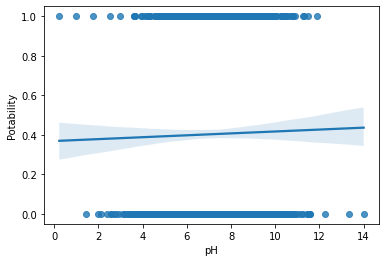

In [34]:
testCorelation('pH')

#### 2. Tes Korelasi Kolom Hardness dengan Kolom Potability

#### Kesimpulan : <br>

H0 ditolak, sehingga ada korelasi antara kolom Hardness (non-target) dan kolom Potability (target).
Koefisien korelasi : -0.0014631528959479344.
Jenis korelasi : Negative Correlation.
Sehingga nilai Hardness yang lebih besar akan dikategorikan pada potability yang lebih kecil atau sebaliknya.


#### Scatter Plot antara Kolom Hardness dengan Potability : <br>

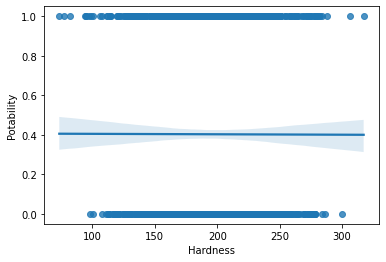

In [35]:
testCorelation('Hardness')

#### 3. Tes Korelasi Kolom Solids dengan Kolom Potability

#### Kesimpulan : <br>

H0 ditolak, sehingga ada korelasi antara kolom Solids (non-target) dan kolom Potability (target).
Koefisien korelasi : 0.03897657818173466.
Jenis korelasi : Positive Correlation.
Sehingga nilai Solids yang lebih besar akan dikategorikan pada potability yang lebih besar atau sebaliknya. 


#### Scatter Plot antara Kolom Solids dengan Potability : <br>

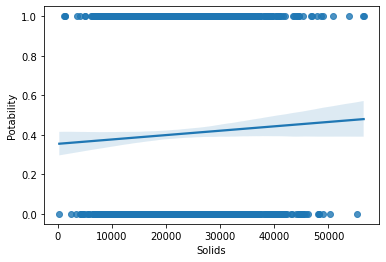

In [36]:
testCorelation('Solids')

#### 4. Tes Korelasi Kolom Chloramines dengan Kolom Potability

#### Kesimpulan : <br>

H0 ditolak, sehingga ada korelasi antara kolom Chloramines (non-target) dan kolom Potability (target).
Koefisien korelasi : 0.02077892184052409.
Jenis korelasi : Positive Correlation.
Sehingga nilai Chloramines yang lebih besar akan dikategorikan pada potability yang lebih besar atau sebaliknya. 


#### Scatter Plot antara Kolom Chloramines dengan Potability : <br>

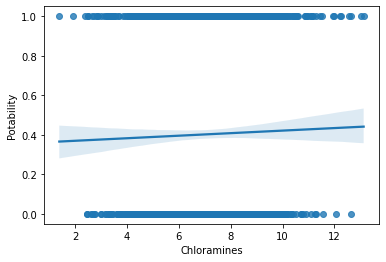

In [37]:
testCorelation('Chloramines')

#### 5. Tes Korelasi Kolom Sulfate dengan Kolom Potability

#### Kesimpulan : <br>

H0 ditolak, sehingga ada korelasi antara kolom Sulfate (non-target) dan kolom Potability (target).
Koefisien korelasi : -0.015703164419273778.
Jenis korelasi : Negative Correlation.
Sehingga nilai Sulfate yang lebih besar akan dikategorikan pada potability yang lebih kecil atau sebaliknya.


#### Scatter Plot antara Kolom Sulfate dengan Potability : <br>

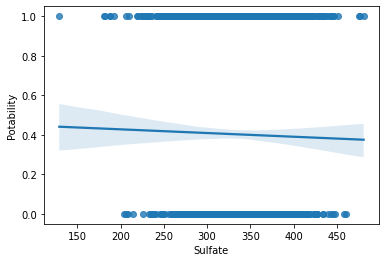

In [38]:
testCorelation('Sulfate')

#### 6. Tes Korelasi Kolom Conductivity dengan Kolom Potability

#### Kesimpulan : <br>

H0 ditolak, sehingga ada korelasi antara kolom Conductivity (non-target) dan kolom Potability (target).
Koefisien korelasi : -0.016257120111377067.
Jenis korelasi : Negative Correlation.
Sehingga nilai Conductivity yang lebih besar akan dikategorikan pada potability yang lebih kecil atau sebaliknya.


#### Scatter Plot antara Kolom Conductivity dengan Potability : <br>

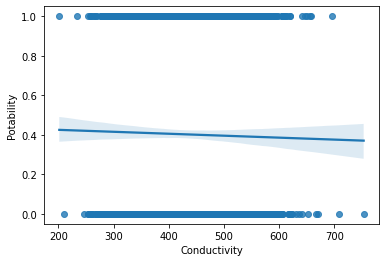

In [39]:
testCorelation('Conductivity')

#### 7. Tes Korelasi Kolom OrganicCarbon dengan Kolom Potability

#### Kesimpulan : <br>

H0 ditolak, sehingga ada korelasi antara kolom OrganicCarbon (non-target) dan kolom Potability (target).
Koefisien korelasi : -0.015488461910747259.
Jenis korelasi : Negative Correlation.
Sehingga nilai OrganicCarbon yang lebih besar akan dikategorikan pada potability yang lebih kecil atau sebaliknya.


#### Scatter Plot antara Kolom OrganicCarbon dengan Potability : <br>

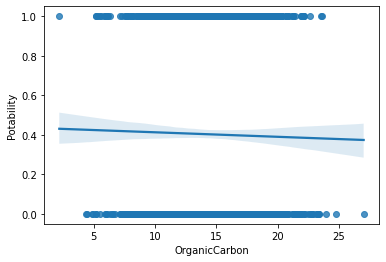

In [40]:
testCorelation('OrganicCarbon')

#### 8. Tes Korelasi Kolom Trihalomethanes dengan Kolom Potability

#### Kesimpulan : <br>

H0 ditolak, sehingga ada korelasi antara kolom Trihalomethanes (non-target) dan kolom Potability (target).
Koefisien korelasi : 0.009236711064712997.
Jenis korelasi : Positive Correlation.
Sehingga nilai Trihalomethanes yang lebih besar akan dikategorikan pada potability yang lebih besar atau sebaliknya. 


#### Scatter Plot antara Kolom Trihalomethanes dengan Potability : <br>

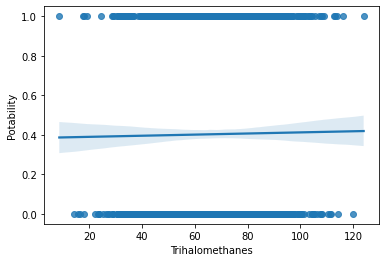

In [41]:
testCorelation('Trihalomethanes')

#### 9. Tes Korelasi Kolom Turbidity dengan Kolom Potability

#### Kesimpulan : <br>

H0 ditolak, sehingga ada korelasi antara kolom Turbidity (non-target) dan kolom Potability (target).
Koefisien korelasi : 0.022331042640622665.
Jenis korelasi : Positive Correlation.
Sehingga nilai Turbidity yang lebih besar akan dikategorikan pada potability yang lebih besar atau sebaliknya. 


#### Scatter Plot antara Kolom Turbidity dengan Potability : <br>

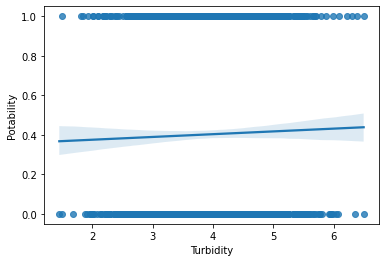

In [42]:
testCorelation('Turbidity')